use span 3309.4170151934327 3309.4170151934327
use halflife 3309.4170151934327 3309.415821354786


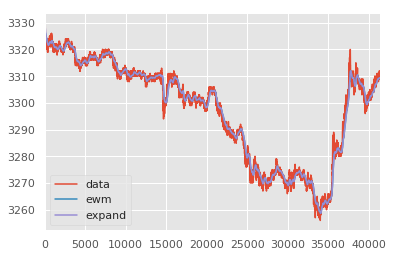

In [2]:
%matplotlib inline 
import pandas as pd 
from dqt import get_fut_taq
import numpy as np

df =get_fut_taq('RB2001', start_date='2019-10-18', end_date='2019-10-18')

data = df['last'].reset_index(drop=True)
span = 300 # _span
ewm_s = pd.Series(data).ewm(span=span, adjust=False).mean()
ewm_s_expand = data.ewm(span=span, adjust=True).mean()
alpha = 2 / (span + 1)
print('use span', ewm_s.iloc[-1], alpha * data.iloc[-1] + (1 - alpha) * ewm_s.iloc[-2])

halflife = 150
alpha = 1-np.exp(np.log(0.5)/halflife)
print('use halflife', ewm_s.iloc[-1], alpha * data.iloc[-1] + (1 - alpha) * ewm_s.iloc[-2])

pd.DataFrame({'data': data, 'ewm': ewm_s, 'expand': ewm_s_expand}).plot()

In [10]:
import talib
import pandas as pd
import numpy as np


data = np.random.random(100)*100
data_input = np.random.random(1)*100#新数据

ema = talib.EMA(data)
dema = talib.DEMA(data)
tema = talib.TEMA(data)

n = 30#ema_timeperiod
K = 2/(n+1)
ema_next = K*data_input+(1-K)*ema[-1]
dema_next = 2*K*data_input-K*ema_next+dema[-1]*(1-K)
tema_next = 3*K*data_input-K*ema_next-K*dema_next+tema[-1]*(1-K)

data_new = np.append(data,data_input)

print(ema_next[0],talib.EMA(data_new)[-1])
print(dema_next[0],talib.DEMA(data_new)[-1])
print(tema_next[0],talib.TEMA(data_new)[-1])

53.00746150136967 53.00746150136966
55.10277523310288 55.10277523310288
56.182391824341316 56.1823918243413


In [12]:
talib.EMA(data_new)

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, 47.21831349,
       45.07641671, 48.45868519, 50.83423751, 50.9420977 , 53.56534224,
       55.82271927, 57.55421758, 53.92313659, 51.19125175, 49.99961055,
       47.36730105, 47.0932979 , 44.30509052, 45.36308026, 48.12965947,
       46.9592576 , 50.25057746, 52.25305846, 54.01437279, 56.10179089,
       53.72604532, 53.77059945, 50.89397267, 53.93714222, 54.11468489,
       51.30107775, 52.05576108, 51.3999568 , 50.52862196, 49.04577162,
       49.76146754, 47.37999508, 44.80019766, 45.70610455, 47.31260046,
       49.47202187, 48.3577227 , 46.63546534, 45.63988293, 49.10

In [3]:
round(0.4)

0